# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [97]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb

url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [98]:
# Crear una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df["title_length"] = df['title'].str.len()

print(df[["title","title_length"]].head())


                      title  title_length
0  The Shawshank Redemption            24
1             The Godfather            13
2    The Godfather: Part II            22
3           The Dark Knight            15
4              Pulp Fiction            12


In [99]:
# Calcular media, mediana y moda de la columna 'title_length'

media = df["title_length"].mean()

mediana = df["title_length"].median()

moda = df["title_length"].mode()[0]

print(f"Media es: {media:.2f}")
print(f"Mediana es: {mediana}")
print(f"Moda es: {moda}")


Media es: 15.48
Mediana es: 14.0
Moda es: 12


In [100]:
# Calcular el rango, la varianza y la desviación estándar de 'title_length'

rango = df["title_length"].max() - df["title_length"].min()
varianza = df["title_length"].var()
desviacion_estandar = df["title_length"].std()

print(f"Rango es: {rango}")
print(f"Varianza es: {varianza:.2f}")
print(f"Desviacion Estandar es: {desviacion_estandar:.2f}")


Rango es: 67
Varianza es: 72.11
Desviacion Estandar es: 8.49


In [101]:
# Calcular asimetría y curtosis de la columna 'title_length'

asimetria = df["title_length"].skew()

curtosis = df["title_length"].kurtosis()

print(f"Asimetria es: {asimetria}")
print(f"Curtosis es: {curtosis}")

Asimetria es: 1.5252523464631278
Curtosis es: 3.8122887061291544


In [102]:
# Imprime el título más corto y el título más largo según su longitud

shortest_title = df.loc[df["title_length"].idxmin(),"title"]

longest_title = df.loc[df["title_length"].idxmax(),"title"]

print(f"Titulo mas corto es: {shortest_title}")
print(f"Titulo mas largo es: {longest_title}")

Titulo mas corto es: M
Titulo mas largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


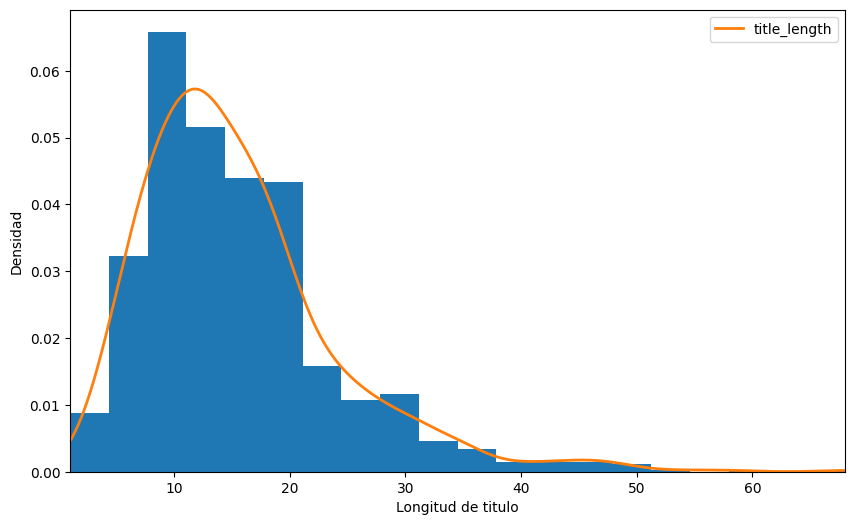

In [103]:
# grafica tus resultados

plt.figure(figsize = (10 , 6))

plt.hist(df['title_length'], bins = 20, alpha = 1, density = True)

df['title_length'].plot.density(linewidth = 2)

plt.xlabel("Longitud de titulo")
plt.ylabel("Densidad")
plt.xlim(df["title_length"].min(), df["title_length"].max())

plt.legend()

plt.show()





---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [104]:
# Crear una lista con 5 valores reales de df['title_length']

df['title_length'].head()

valores = df['title_length'].head().tolist()

print(valores)

[24, 13, 22, 15, 12]


In [105]:
# Calcular la media de los 5 valores

media = sum(valores) // len(valores)


In [106]:
# Calcular las diferencias al cuadrado con respecto a la media

diferencias_cuadrado = [(x - media) ** 2 for x in valores]
print(diferencias_cuadrado)

[49, 16, 25, 4, 25]


In [107]:
# Calcular la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = sum(diferencias_cuadrado) // len(diferencias_cuadrado)
desviacion = varianza ** 0.5
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")

Varianza: 23
Desviación estándar: 4.795831523312719
